In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.manifold
import glob
import sklearn.cluster
import pandas as pd

In [3]:
data1 = pd.read_csv("clean2.data")

In [4]:
data1 = np.array(data1)[:,2:]

In [5]:
X = data1[:,:-1]
Y = data1[:,-1]

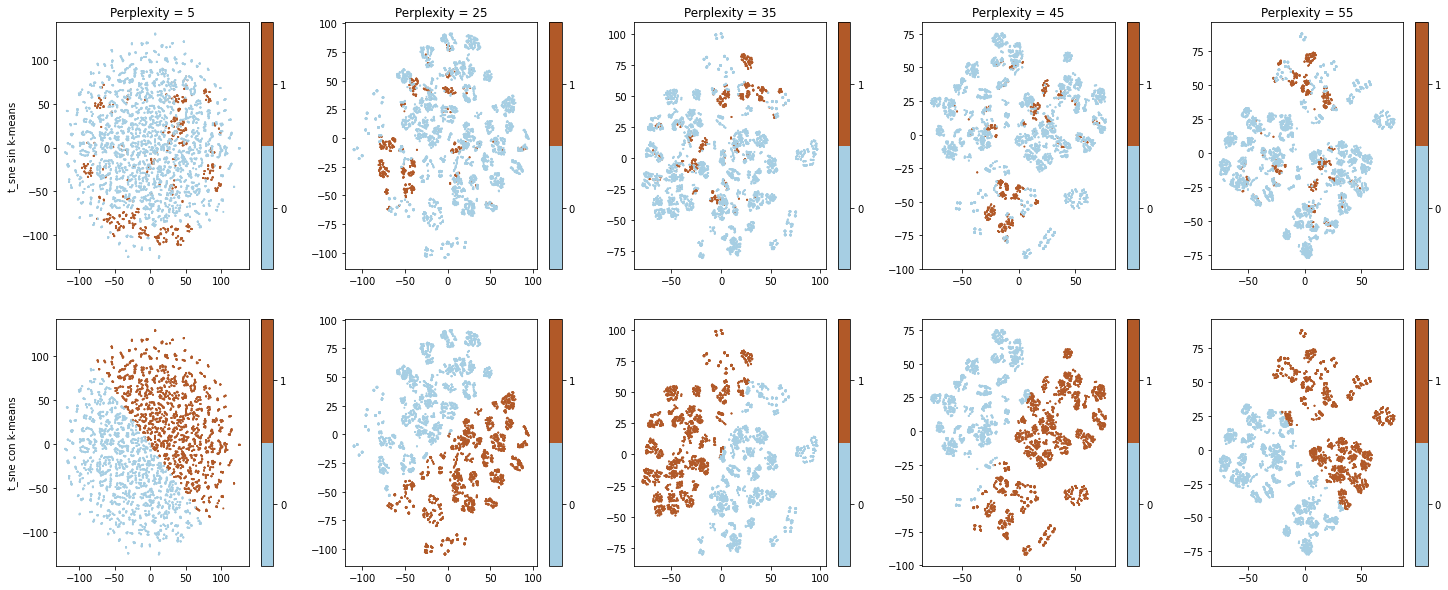

In [7]:
perplexity = [5,25,35,45,55]
plt.figure(figsize = (25,10))
for i in range(len(perplexity)):
    plt.subplot(2,5,i+1)
    tsne = sklearn.manifold.TSNE(perplexity=perplexity[i])
    tsne.fit(X)
    embedding = tsne.embedding_
    plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))
    if(i==0):
        plt.ylabel('t_sne sin k-means')
    plt.title('Perplexity = {}'.format(perplexity[i]))
    plt.subplot(2,5,i+6)
    n_clusters = 2
    k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
    k_means.fit(embedding)
    cluster = k_means.predict(embedding) 
    distance = k_means.transform(embedding)
    plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))
    if(i==0):
        plt.ylabel('t_sne con k-means')

# Análisis

El conjunto de datos seleccionados corresponde a una clasificación de moléculas en musks y no musks. De esta esta manera, es de esperarse que, al correr los algoritmos se encuentren dos grupos de clasificación. Exactamente este comportamiento se ve evidenciado al realizar el t-sne y, posteriormente, aplicarle k-means. En esta ocasión, se varió el parámetro perplexity del t-sne entre los valores 5,25,35,45,55. Se puede observar que a medida que se incrementa el parámetro se perfecciona la agrupación que realiza el algoritmo. Igualmente, en todos los casos se observa que no hay una separación clara entre el grupo asociado a musk y el asociado a no-musk. Por lo tanto, al aplicar k-means no se realiza una partic